## data preprocessing 

## Converting unstructed yolo annotations to pascal voc format

In [6]:
import os
import glob
import cv2
import shutil
import random
import os.path as osp
import json

import re
import xml.etree.ElementTree as ET
from typing import Dict, List
def convert_txt(source):

    for txt_file in glob.glob(source + '/*.txt'):

        f = open(txt_file)
        f_str = f.read()
        f.close()

        lst = list(map(int, f_str.split()))
        n = lst[0]

        fx = open(txt_file.replace(".txt",".xml"), "x")

        fx.write("<annotation>\n")

        fx.write("  <filename>{}.jpg</filename>\n".format(txt_file.replace(source,"").replace(".txt","").replace("/","").replace("\\","")))
        im = cv2.imread(os.path.join("data_gun/images",txt_file.split("/")[-1].split(".")[0]+".jpg"))
        h,w,c = im.shape
        fx.write("  <size>\n")
        fx.write("      <width>{}</width>\n".format(w))
        fx.write("      <height>{}</height>\n".format(h))
        fx.write("      <depth>{}</depth>\n".format(c))
        fx.write("  </size>\n")

        fx.write("  <segmented>0</segmented>\n")

        for i in range(n):
            xmin = lst[(i*4)+1]
            ymin = lst[(i*4)+2]
            xmax = lst[(i*4)+3]
            ymax = lst[(i*4)+4]
            fx.write("  <object>\n")
            fx.write("      <name>Gun</name>\n")
            fx.write("      <bndbox>\n")
            fx.write("          <xmin>{}</xmin>\n".format(xmin))
            fx.write("          <ymin>{}</ymin>\n".format(ymin))
            fx.write("          <xmax>{}</xmax>\n".format(xmax))
            fx.write("          <ymax>{}</ymax>\n".format(ymax))
            fx.write("      </bndbox>\n")
            fx.write("  </object>\n")
        fx.write("</annotation>")
        fx.close()
# source="yolo_annotations"
# convert_txt(source)

# convert images into .jpg format

In [ ]:

import os
import glob
for im in glob.glob("../data_gun/images/*.jpeg"):
    os.rename(im,".."+im.split(".")[2]+".jpg")

## checking  the ground truths of each image by ploting each image using labelvix library 

    Discord the annotations files which don't have labels and also remove which have improper annotations 

In [ ]:
#pip install labelvis
from labelvis.labelvis import LabelVisualizer

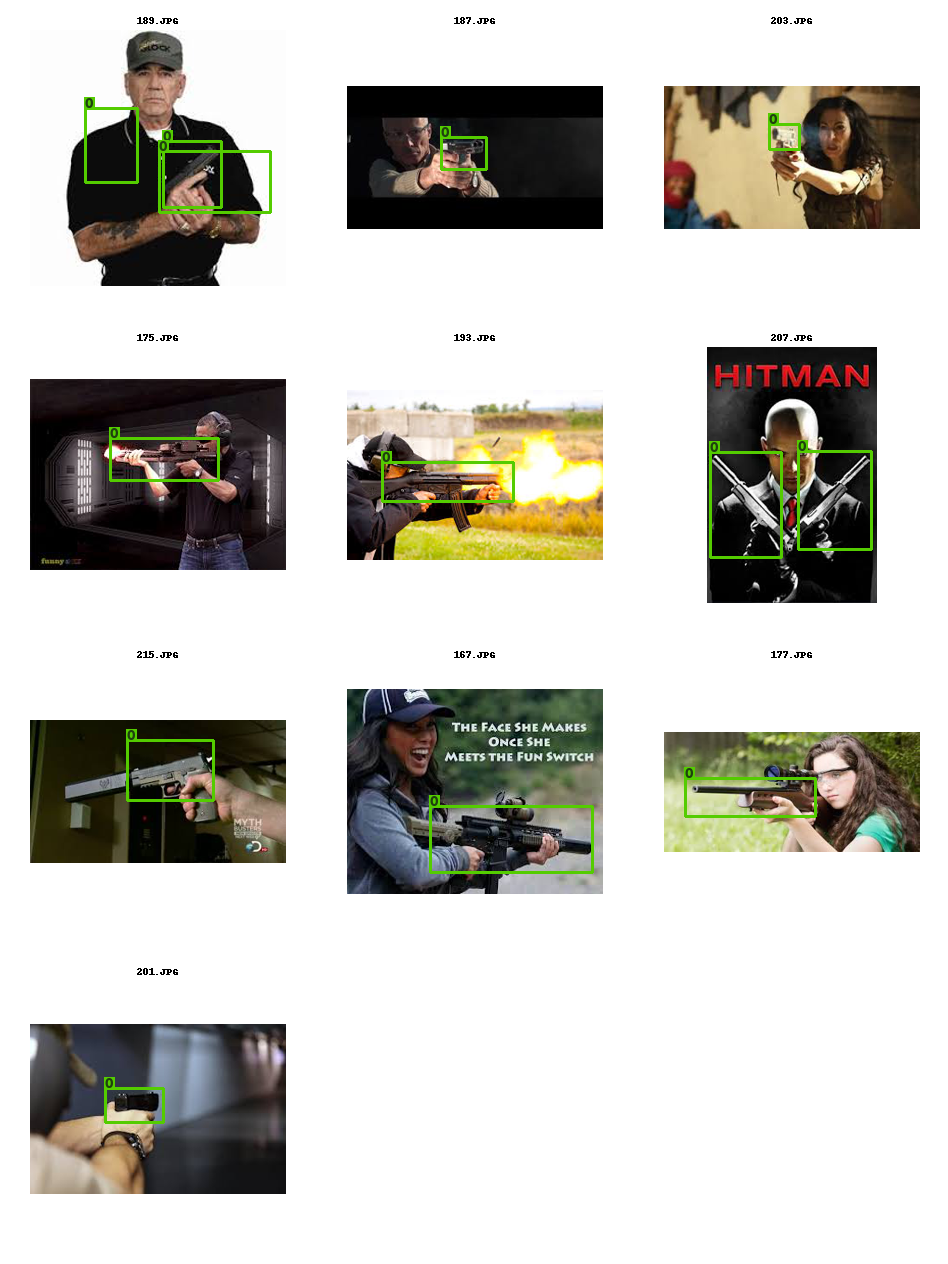

In [5]:
imgs_path = "yolo/test/images"
annotations_path = "yolo/test/annotations"
annotations_format = "yolo" #["coco","pascal","manifest","yolo","simple_json"]
img_size = 256
labelvis = LabelVisualizer(imgs_path,annotations_path,annotations_format,img_size=img_size)

num_images = 10 #Number Images to Visualize
labelvis.show_batch(num_imgs=num_images)


## Check the distrubution of bouding boxes using optical 

##  After excuting below commands we get the EDA of data and also train and vlidation data sets in proper yolo annotation formate 

In [9]:
#pip install optical
#open the terminal and excutte below commands after installing optical
# python3
# >>>from optical import Annotation

# >>>annotation = Annotation(root = "/path/to/dataset", format="pascal")

# >>> splits = annotation.train_test_split(test_size = 0.2, stratified = True)

# >>> splits.save("/path/to/output/dir")

# >>> annotation.export(to = "yolo")